<a href="https://colab.research.google.com/github/mohammadkaifee/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
              
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBatter/Capstone_Projects/Bike_Sharing_ML_Regression Capstone Project/SeoulBikeData.csv' , encoding = 'latin-1')

#Exploratory data analysis

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [6]:
#checking info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
#checking shape of data
df.shape

(8760, 14)

In [8]:
a=df.isna().sum()
b=[i for i in a]
b

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

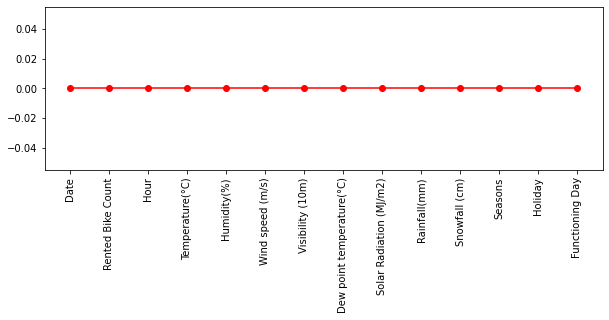

In [9]:
plt.figure(figsize=(10,3))
plt.plot(df.columns,b, '-ro')
plt.xticks(rotation = 90)
plt.show()

In [10]:
# Data Description
df.describe().transpose()     

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [11]:
# Date columns to Date format conversion
df['Date']= pd.to_datetime(df['Date'])

In [12]:
# extracting day,month, day of week and weekdays/weekend from date column
df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day_of_week'],axis=1)

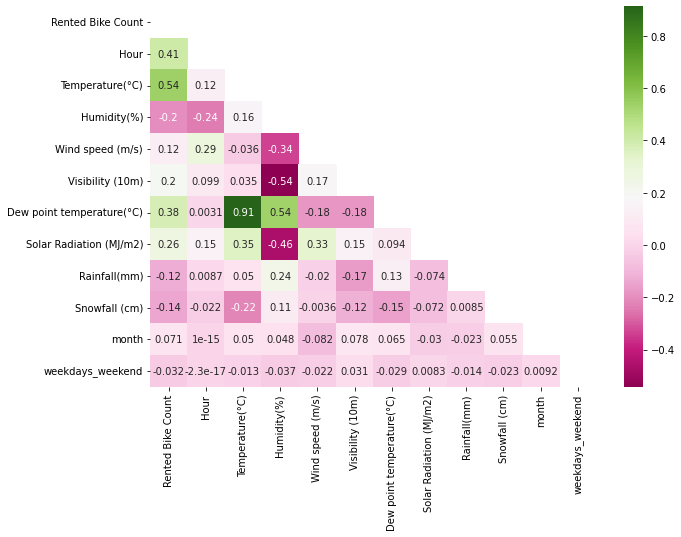

In [13]:
#checking correlation using heatmap
cr = df.corr()
plt.figure(figsize=(10,7))
drop_Self = np.zeros_like(cr)
drop_Self[np.triu_indices_from(drop_Self)] = True
sns.heatmap(df.corr(),cmap='PiYG',annot=True, mask=drop_Self)
plt.show()

In [14]:
numeric_features= df.select_dtypes(exclude='object')
l1=numeric_features.columns
l1

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month',
       'weekdays_weekend'],
      dtype='object')

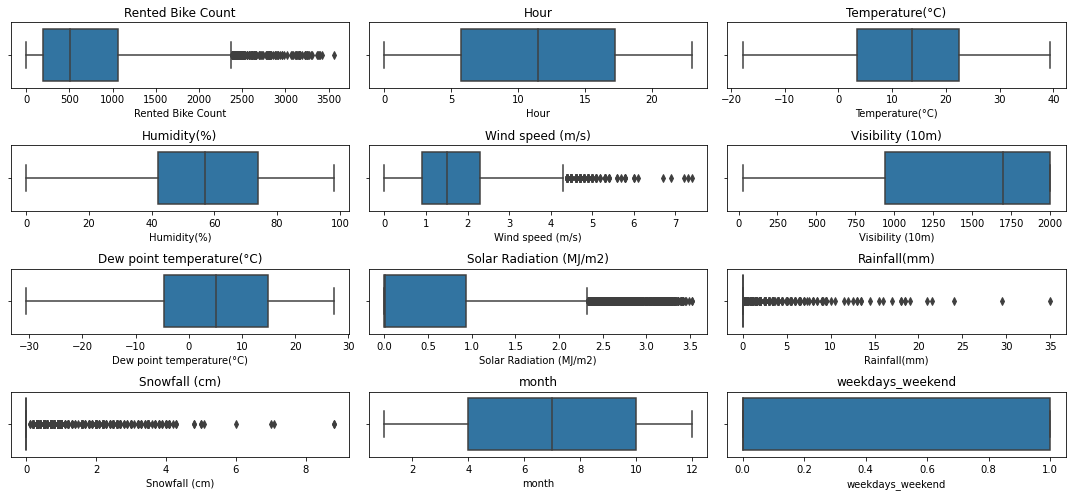

In [15]:
# checking Outliers with seaborn boxplot
n = 1
plt.figure(figsize=(15,7))
for i in l1:
  plt.subplot(4,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()


##Let's try something else to get information from our Numerical features

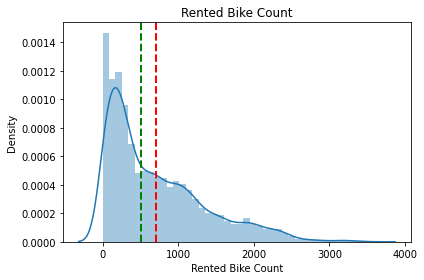

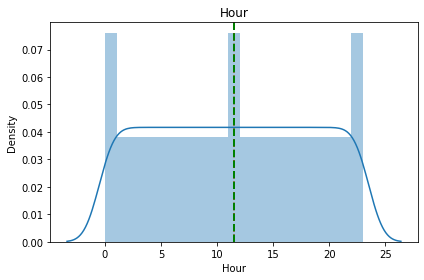

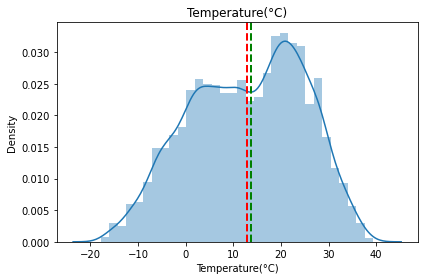

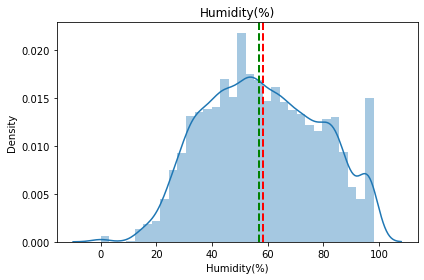

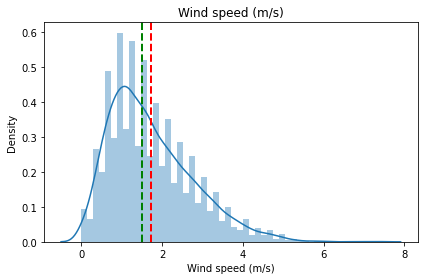

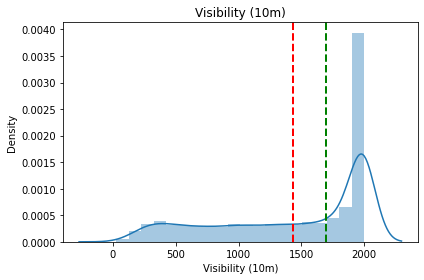

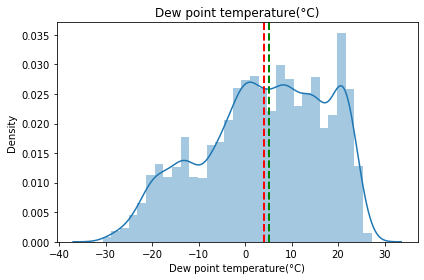

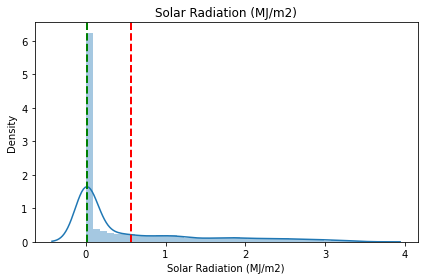

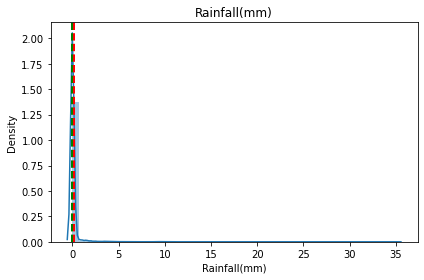

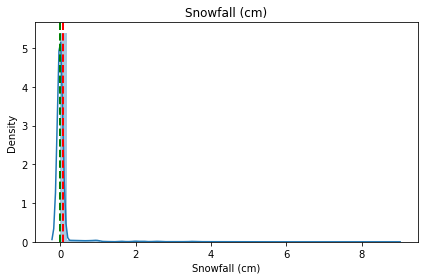

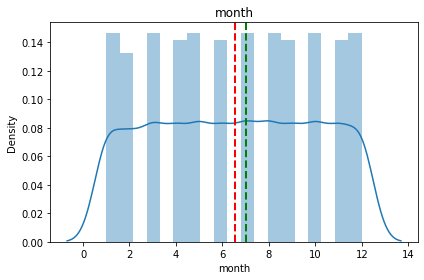

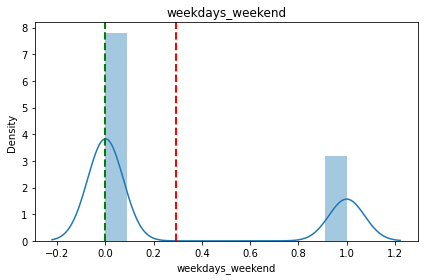

In [16]:
#plotting histogram of all the numeric features of the dataset
for i in l1:
  fig=plt.figure()
  ax=fig.gca()
  ftr=df[i]
  sns.distplot(ftr)
  plt.title(i)
  plt.tight_layout()
  plt.axvline(ftr.mean(), color='red', linestyle='dashed', linewidth=2)
  plt.axvline(ftr.median(), color='green', linestyle='dashed', linewidth=2)

From this we are coming to know that the features which are skewed, their mean and the median are also skewed, which was understood by looking at the graph that this would happen.

##Lets try to find how is the relation of numerical features with our dependent variable

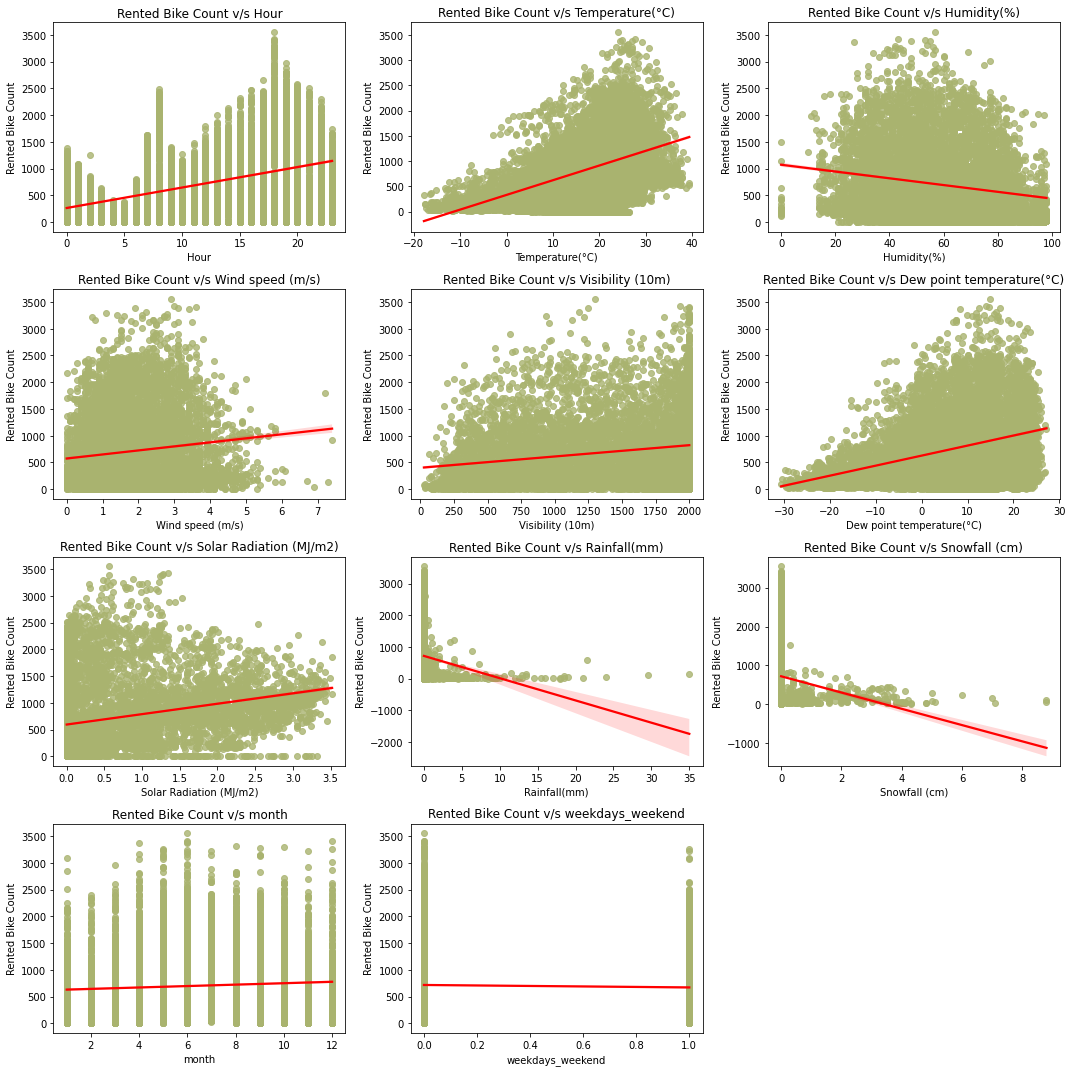

In [17]:
# Regression plot to know relation with our independent variable
n=1
plt.figure(figsize=(15,15))
for i in l1:
  if i == 'Rented Bike Count':
    pass
  else:
    plt.subplot(4,3,n)
    n+=1
    sns.regplot(df[i], df['Rented Bike Count'],scatter_kws={"color": "#A9B36F"}, line_kws={"color": "red"})
    plt.title(f'Rented Bike Count v/s {i}')
    plt.tight_layout()

This regression plots shows that some of our features are positive linear and some are negative linear in relation to our target variable.

##**Explore our categorical feature and Trying to take some important information from the categorical feature**

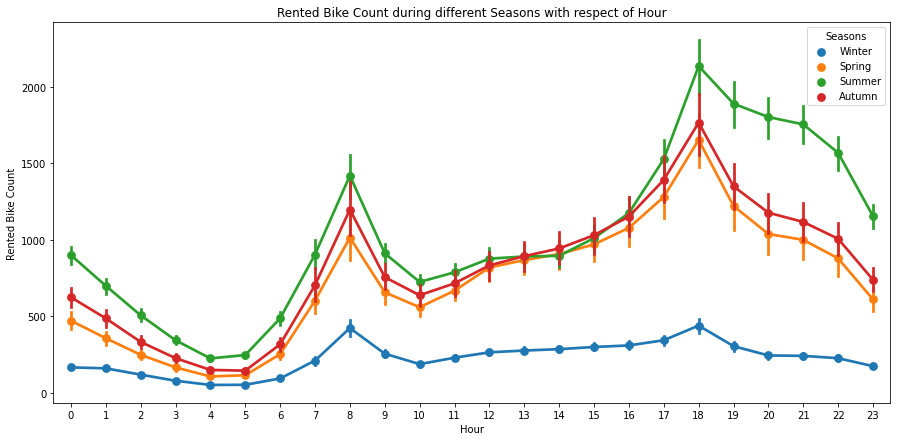

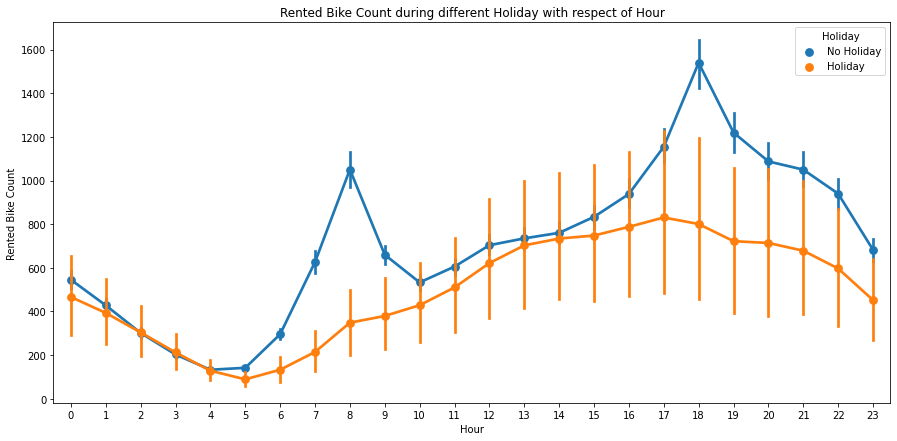

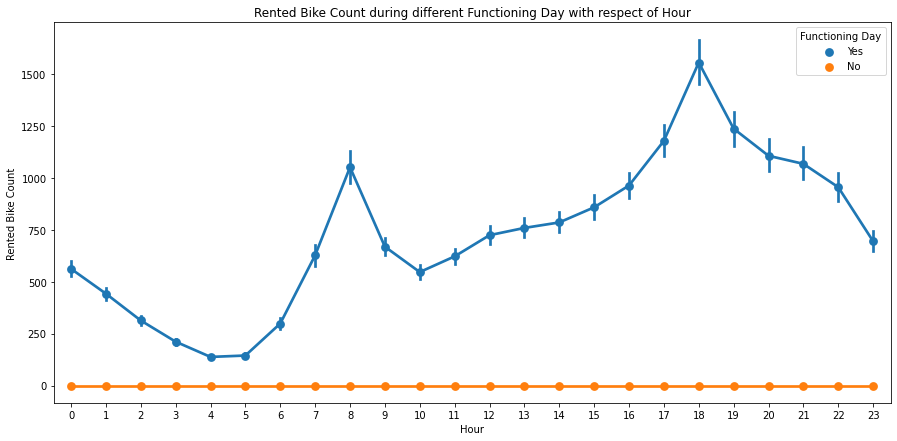

In [18]:
# we create point plots with Rented Bike Count during different categorical features with respect of Hour
categorical_features=df.select_dtypes(include='object')

for i in categorical_features.columns:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(15,7))
    sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df[i])
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
  plt.show()

In [19]:
categorical_features=df.select_dtypes(include='object')
categorical_features.head()

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


In [20]:
numeric_features.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0


In [21]:
#Extracting categorical features
categorical_features= df.select_dtypes(include='object')

In [22]:
categorical_features

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


In [23]:
list(categorical_features.columns)

['Seasons', 'Holiday', 'Functioning Day']


---------------------------------------- Seasons ----------------------------------------



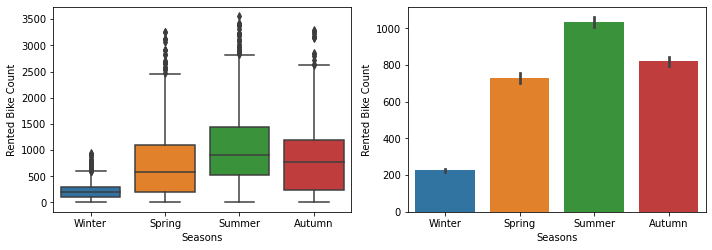


---------------------------------------- Holiday ----------------------------------------



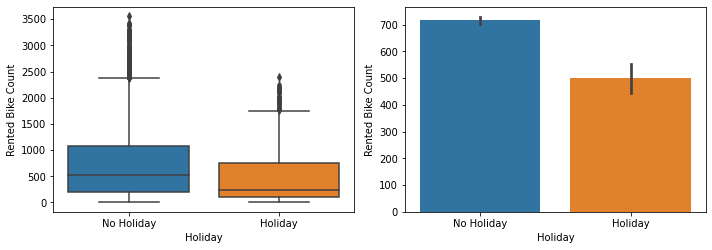


---------------------------------------- Functioning Day ----------------------------------------



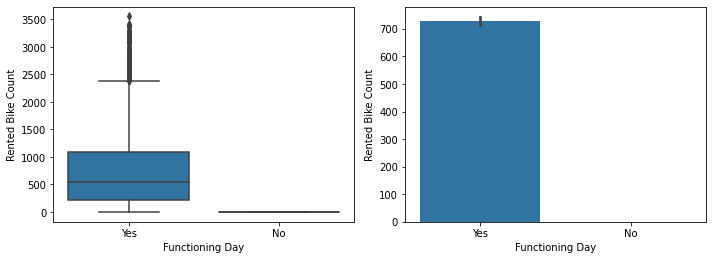

In [24]:
# creating boxplot plot and bar plot
n=1
for i in categorical_features.columns:
  plt.figure(figsize=(10,10))
  plt.subplot(3,2,n)
  n+=1
  print()
  print('-'*40,i,'-'*40)
  print()
  sns.boxplot(x=df[i],y=df["Rented Bike Count"])
  plt.subplot(3,2,n)
  n += 1
  sns.barplot(df[i],df['Rented Bike Count'])
  plt.tight_layout()
  plt.show()

Conclusion

1)Less demand on winter seasons

2)Sligthly Higher demand during Non holidays

3)Almost no demnad on non functioning day

In [25]:
df['Seasons'].value_counts().keys().tolist()

['Spring', 'Summer', 'Autumn', 'Winter']

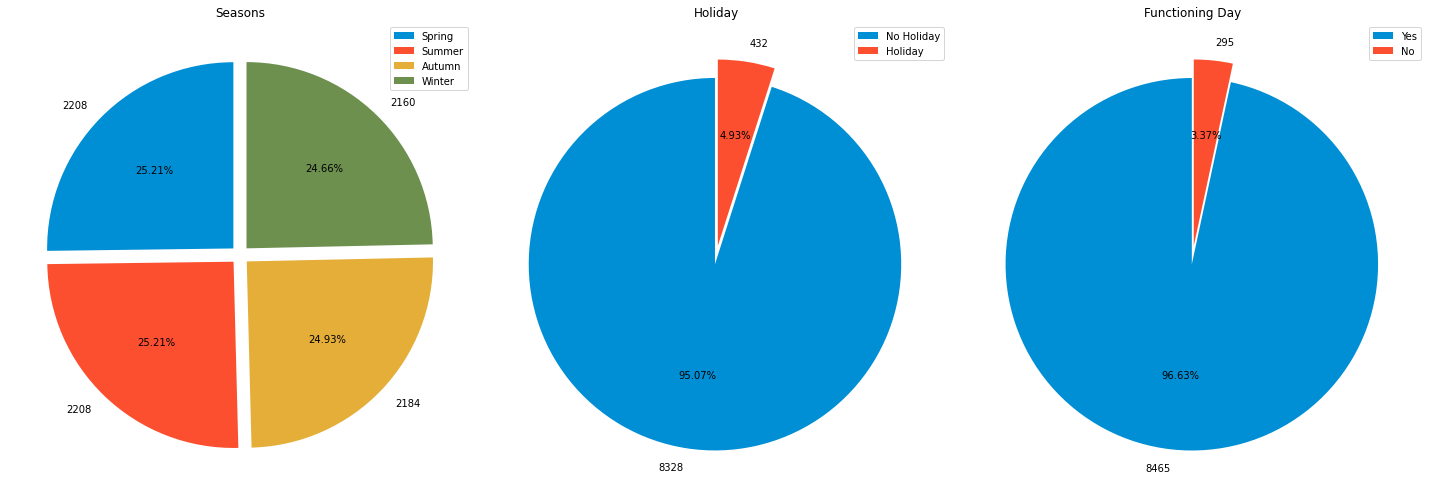

In [26]:
# creating pieplot for all categorical feature
n=1
plt.figure(figsize=(20,15))
colors = ['#008fd5','#fc4f30','#e5ae38','#6d904f','#8b8b8b']
for i in categorical_features.columns:
  explode=[0.05 for i in range(len(df[i].value_counts().keys().tolist()))]
  colors = [i for i in colors]
  plt.subplot(1,3,n)
  n=n+1
  plt.pie(df[i].value_counts(),labels = df[i].value_counts().values, colors= colors, explode=explode, autopct = '%2.2f%%', startangle=90)
  plt.title(i)
  plt.legend(df[i].value_counts().keys())
  plt.tight_layout()

In [27]:
#checking counts of functioning day
df[['Functioning Day']].value_counts()

Functioning Day
Yes                8465
No                  295
dtype: int64

<Figure size 1080x720 with 0 Axes>

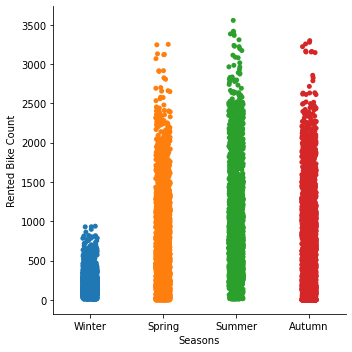

In [28]:
#ploting cat plot for more info
plt.figure(figsize=(15,10))
sns.catplot(x='Seasons',y='Rented Bike Count',data=df)
plt.show()

Conclusion

### ***We can clearly see that there is less demand of rented bike during winter season***

Observation

From all these pointplot we have observed a lot from every column like :

Season

In the season column, we are able to understand that the demand is low in the winter season.

Holiday

In the Holiday column, The demand is low during holidays, but in no holidays the demand is high, it may be because people use bikes to go to their work.

Functioning Day

In the Functioning Day column, If there is no Functioning Day then there is no demand

Days of week

In the Days of week column, We can observe from this column that the pattern of weekdays and weekends is different, in the weekend the demand becomes high in the afternoon. While the demand for office timings is high during weekdays, we can further change this column to weekdays and weekends.

month

In the month column, We can clearly see that the demand is low in December January & Febuary, It is cold in these months and we have already seen in season column that demand is less in winters.

year

The demand was less in 2017 and higher in 2018, it may be because it was new in 2017 and people did not know much about it

1)High rise of Rented Bikes from 8:00 a.m to 9:00 p.m means people prefer rented bike during rush hour.

2)we can clearly see that demand rises most at 8 a.m and 6:00 p.m so we can say that that during office opening and closing time there is much high demand.

In [29]:
#creating Dummy variable for categorical columns
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)

In [30]:
dummy_categorical_feature.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,0,1,1,1
1,0,0,1,1,1
2,0,0,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1


In [31]:
#concating numeric columns and dummy columns and creating final df
final_df= pd.concat([dummy_categorical_feature,numeric_features],axis=1)

In [32]:
#showing head of final df
final_df.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekdays_weekend
0,0,0,1,1,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0
1,0,0,1,1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0
2,0,0,1,1,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0
3,0,0,1,1,1,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0
4,0,0,1,1,1,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0


In [33]:
#describing final DF
final_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Seasons_Spring,8760.0,0.252055,0.434217,0.0,0.00,0.00,1.00,1.00
Seasons_Summer,8760.0,0.252055,0.434217,0.0,0.00,0.00,1.00,1.00
Seasons_Winter,8760.0,0.246575,0.431042,0.0,0.00,0.00,0.00,1.00
Holiday_No Holiday,8760.0,0.950685,0.216537,0.0,1.00,1.00,1.00,1.00
Functioning Day_Yes,8760.0,0.966324,0.180404,0.0,1.00,1.00,1.00,1.00
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40


##**MACHINE LEARNING MODEL (REGRESSION)**

#Creating Function to train linear models and calculate scores 

In [34]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [35]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
  
  print()
  print('-'*25,'Evalution Matrix','-'*25)
  print()

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)

  print()
  print('-'*25,'Evalution Matrix','-'*25)
  print()

#appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print()
  print('-'*50,'Evalution Graph','-'*50)
  print()

  plt.figure(figsize=(15.5,8))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

#Creating function to run diffirent models



In [36]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print()
    print('-'*25,'Evalution Matrix','-'*25)
    print()

    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)
    print()
    print('-'*25,'Evalution Matrix','-'*25)
    print()

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    #ploting 
    print()
    print('-'*50,'Evalution Graph','-'*50)
    print()
    plt.figure(figsize=(15.5,8))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

#Creating function to get feature importance

In [37]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

##We saw that our dependent variable is right skewed, it needs to be normalized. We do some experiments to normalize it

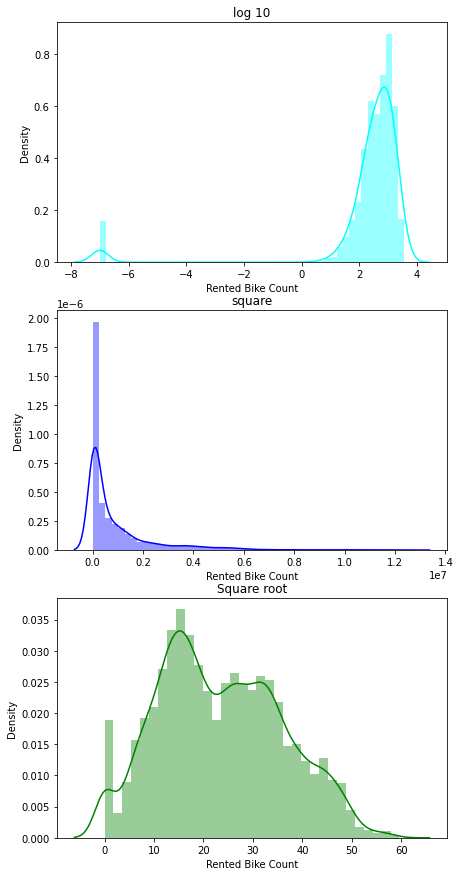

In [38]:
fig,axes = plt.subplots(3,1,figsize=(7,15))
sns.distplot(np.log10(df['Rented Bike Count']+0.0000001),ax=axes[0],color='cyan').set_title("log 10")
sns.distplot((df['Rented Bike Count']**2),ax=axes[1],color='blue').set_title("square")
sns.distplot(np.sqrt(df['Rented Bike Count']),ax=axes[2], color='green').set_title("Square root")
plt.show()

Our data in green plot is normalized to some extent: so we will go with square root on our dependent variable

#Train | Test Split for Linear Regression

In [39]:
# Train - Spliting  data
X=final_df.drop(['Rented Bike Count'],axis=1)

In [40]:
X.shape

(8760, 16)

In [41]:
y=np.sqrt(final_df['Rented Bike Count'])

In [42]:
#spliting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [43]:
#scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

#Linear Regresseion

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
#linear regression model

linear_model= LinearRegression()


------------------------- Evalution Matrix -------------------------

MSE : 188341.05272928104
RMSE : 433.9827793003785
R2 : 0.5590165771027925
Adjusted R2 :  0.5535765348773836

------------------------- Evalution Matrix -------------------------


-------------------------------------------------- Evalution Graph --------------------------------------------------



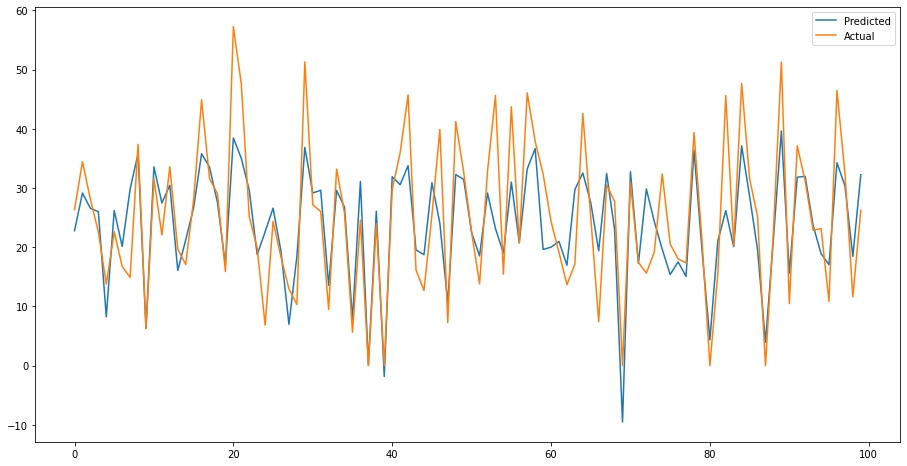

In [46]:
train_linear_model(linear_model, X_train, y_train, X_test, y_test)

#Regularisation

#Lasso Regression

In [47]:
from sklearn.linear_model import Lasso

In [48]:
# finding the best parameters for lasso by gridsearchcv
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)


------------------------- Evalution Matrix -------------------------

MSE : 188084.63902378644
RMSE : 433.68725946675727
R2 : 0.5596169464428179
Adjusted R2 :  0.5541843104698688

------------------------- Evalution Matrix -------------------------


-------------------------------------------------- Evalution Graph --------------------------------------------------



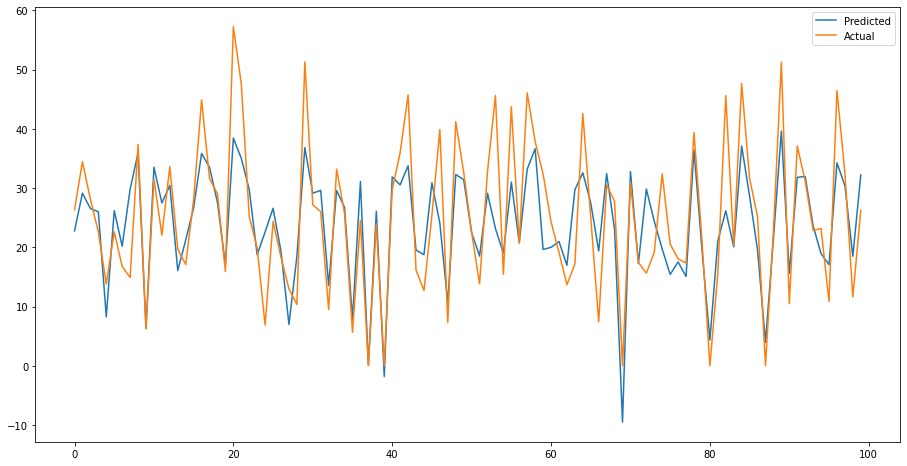

In [49]:
# calling train_linear_model to train,fit and evalution of lasso model
train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)

#Ridge Regression

In [50]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=2)


------------------------- Evalution Matrix -------------------------

MSE : 188203.48070807089
RMSE : 433.82425094509284
R2 : 0.5593386894618826
Adjusted R2 :  0.5539026208661926

------------------------- Evalution Matrix -------------------------


-------------------------------------------------- Evalution Graph --------------------------------------------------



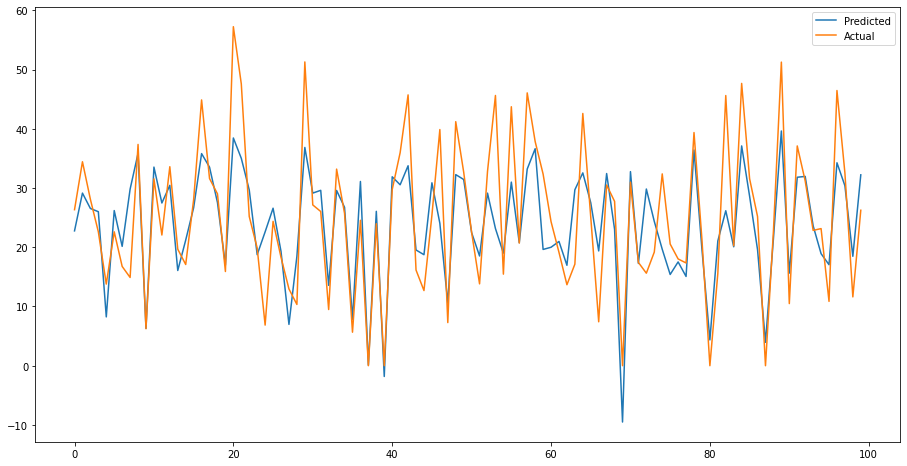

In [51]:
# calling train_linear_model to train,fit and evalution of ridge model

train_linear_model(ridge_grid,X_train,y_train,X_test,y_test)

#ElasticNet Regression

In [52]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=4)


------------------------- Evalution Matrix -------------------------

MSE : 188275.44090884004
RMSE : 433.9071800614044
R2 : 0.5591702012051394
Adjusted R2 :  0.5537320541112938

------------------------- Evalution Matrix -------------------------


-------------------------------------------------- Evalution Graph --------------------------------------------------



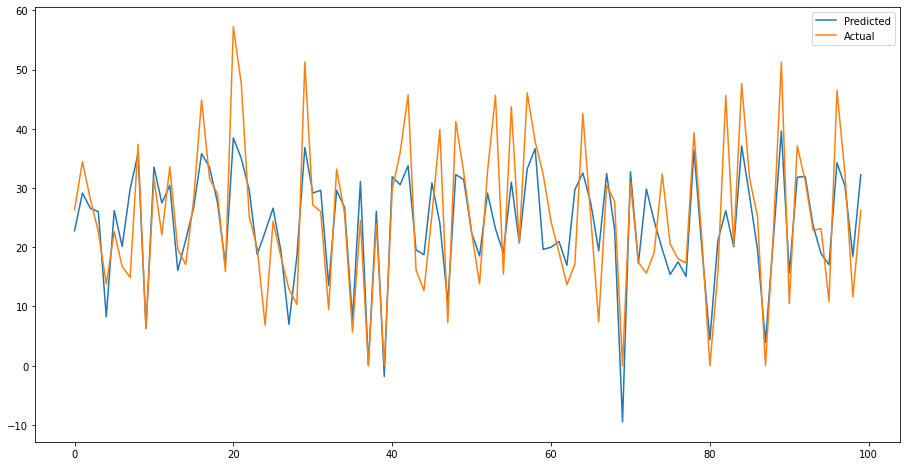

In [53]:
# calling train_linear_model to train,fit and evalution of elasticnet model
train_linear_model(elastic_grid,X_train,y_train,X_test,y_test)

#Polynomial Regression

In [54]:
#creating pipeline to convert x to polynomial feature and apply Linear Regression

from sklearn.pipeline import make_pipeline
#importing polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [55]:
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())


------------------------- Evalution Matrix -------------------------

MSE : 126401.04386494846
RMSE : 355.52924473937225
R2 : 0.7040434670317677
Adjusted R2 :  0.7003924997784973

------------------------- Evalution Matrix -------------------------


-------------------------------------------------- Evalution Graph --------------------------------------------------



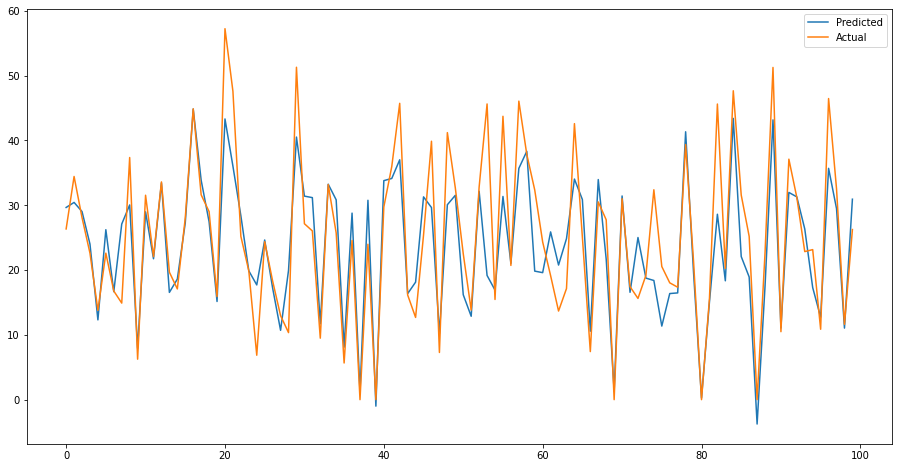

In [56]:
# calling train_linear_model to train,fit and evalution of polynomial model
train_linear_model(pipe,X_train,y_train,X_test,y_test)

#KNN and Tree Based Method
#Train | Test split Data For Tree based methods

In [57]:
#creatin X for independent variable
X=final_df.drop(['Rented Bike Count'],axis=1)

In [58]:
#creating y for dependent variable
y=final_df['Rented Bike Count']

In [59]:
#spliting X and y to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

#KNN Regression

In [60]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [61]:
#creating model
scaler = MinMaxScaler()

In [62]:
#scaling all the feature by min max scaler
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


------------------------- Evalution Matrix -------------------------

MSE : 78350.03027228141
RMSE : 279.91075412045427
R2 : 0.8102517115563737
Adjusted R2 :  0.8079109462401839

------------------------- Evalution Matrix -------------------------


-------------------------------------------------- Evalution Graph --------------------------------------------------



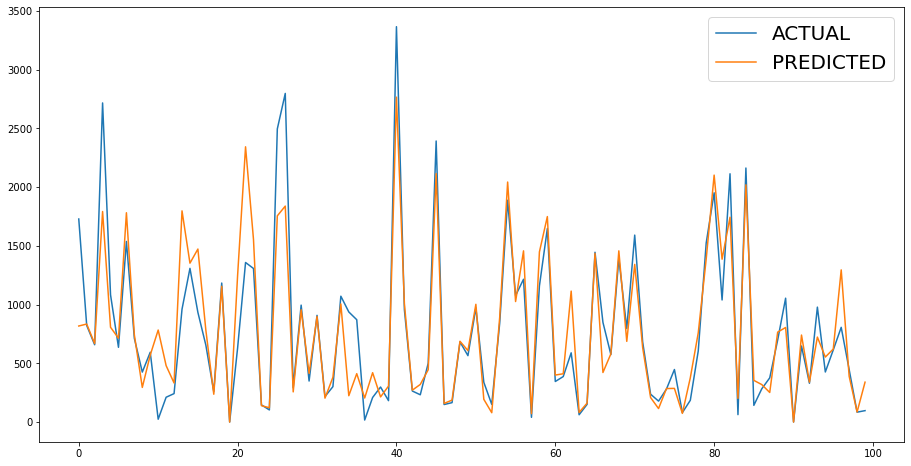

In [63]:
# creating KNN model
knn_model = KNeighborsRegressor(n_jobs=-1)

# finding the best parameters for knn_model by gridsearchcv
param_dict={'n_neighbors':[3,5,7,9,11,13,15,21,23,25]}
knn_grid= GridSearchCV(knn_model,param_grid=param_dict)

# training and evaluating the PolynomialFeatures
run_model(knn_grid,X_train_scaled,y_train,X_test_scaled,y_test)

#Decision Tree Regression

In [64]:
from sklearn.tree import DecisionTreeRegressor


------------------------- Evalution Matrix -------------------------

MSE : 95768.96270928462
RMSE : 309.4656082818972
R2 : 0.7680664998219267
Adjusted R2 :  0.7652053309685348

------------------------- Evalution Matrix -------------------------


-------------------------------------------------- Evalution Graph --------------------------------------------------



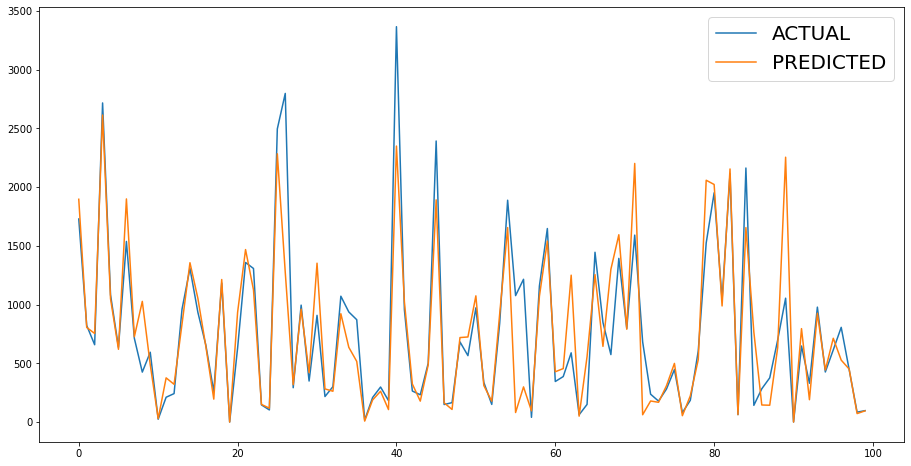

In [65]:
#creating decision tree model
dt_model = DecisionTreeRegressor()
#calling run_model to train,fit and evalution of decision tree model
run_model(dt_model,X_train,y_train,X_test,y_test)

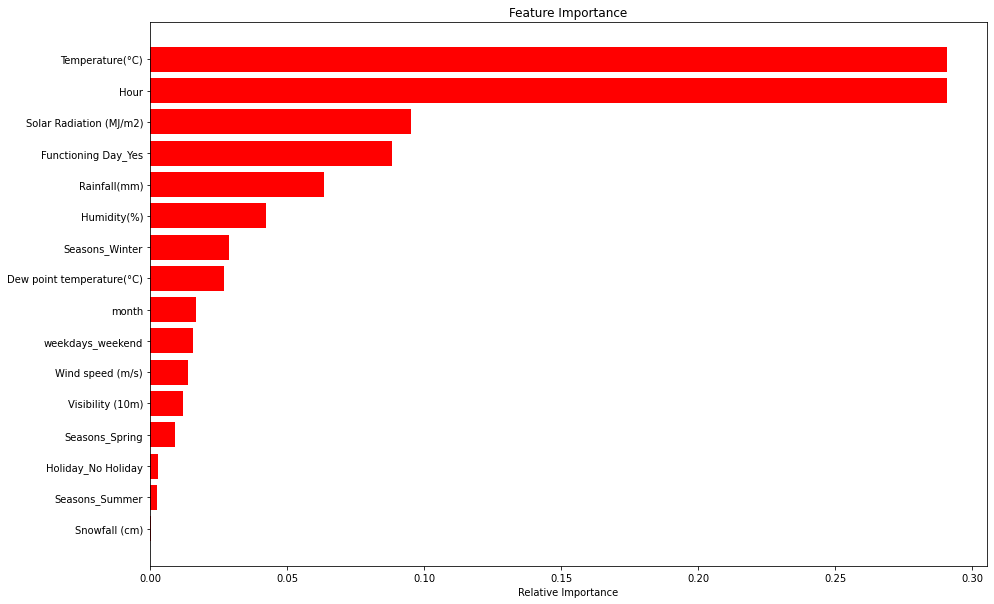

In [66]:
#getting features importance of decision tree
get_features_importance(dt_model,X_train)

#Random Forest

In [67]:
#importing Random forest
from sklearn.ensemble import RandomForestRegressor

In [68]:
#creating model of random forest
rf_model = RandomForestRegressor()

In [69]:
#creating param dict to check random forest with diffirent value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [70]:
#creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)


------------------------- Evalution Matrix -------------------------

MSE : 58712.28207048546
RMSE : 242.30617423104485
R2 : 0.8578104565527485
Adjusted R2 :  0.856056383541834

------------------------- Evalution Matrix -------------------------


-------------------------------------------------- Evalution Graph --------------------------------------------------



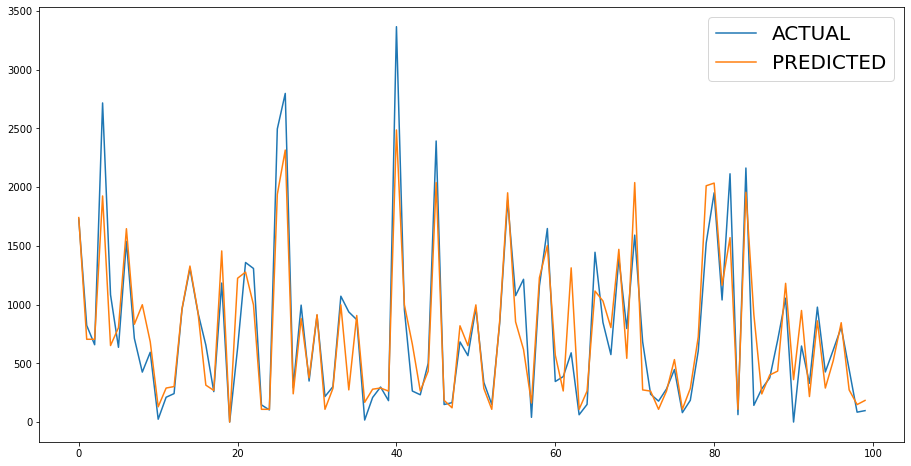

In [71]:
#calling run_model to train,fit and evalution of decision tree model
run_model(rf_grid,X_train,y_train,X_test,y_test)

In [72]:
#optimal rf model
optimal_rf_model=rf_grid.best_estimator_

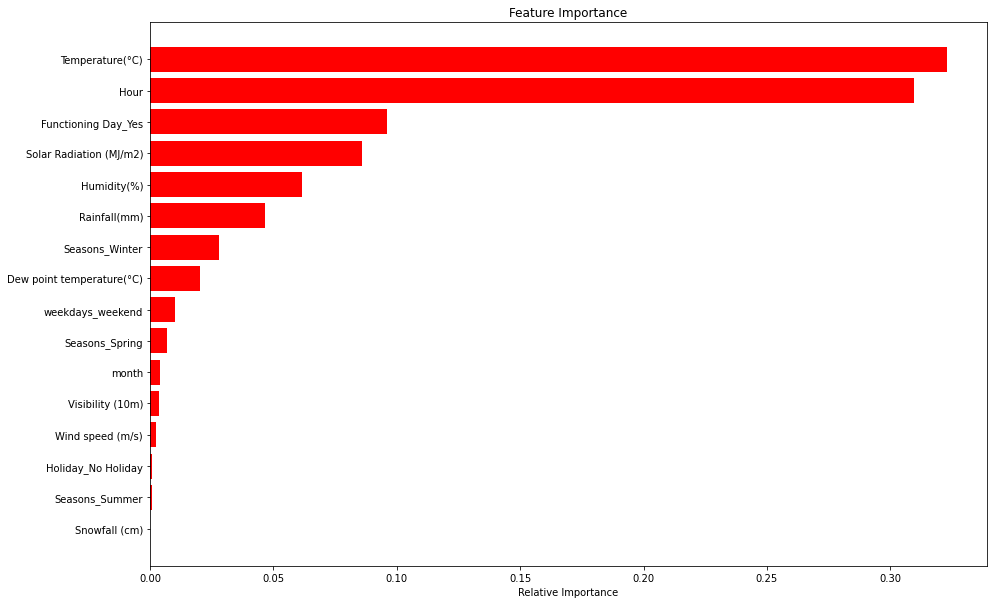

In [73]:
#getting and visualizing features importance  of rf model
get_features_importance(optimal_rf_model,X_train)

#Gradient Boosting

In [74]:
#importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [75]:
#creating model of Gradient Boosting
gb_model=GradientBoostingRegressor()

In [76]:
# creating param dict to check diffirent value of parameter
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [77]:
#grid search for gradient bossting
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)


------------------------- Evalution Matrix -------------------------

MSE : 55568.0362956274
RMSE : 235.72873455653937
R2 : 0.8654251983997149
Adjusted R2 :  0.8637650620654014

------------------------- Evalution Matrix -------------------------


-------------------------------------------------- Evalution Graph --------------------------------------------------



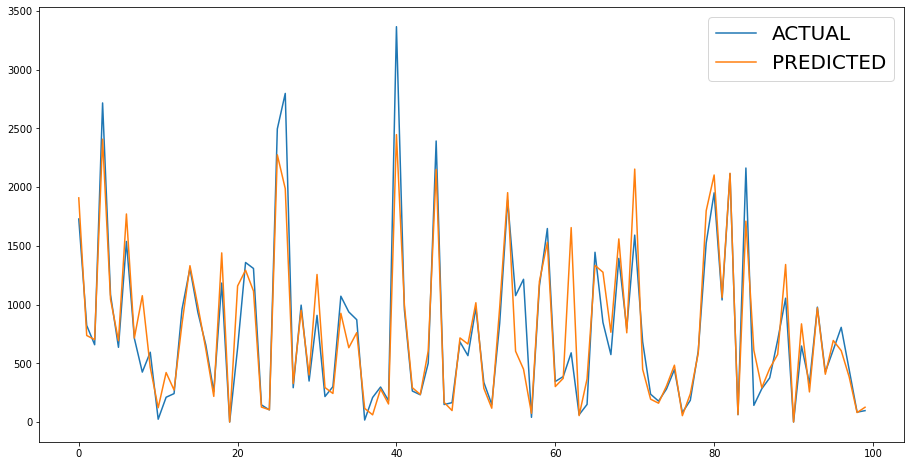

In [78]:
#calling run_model to train,fit and evalution of gradient boosting model
run_model(gb_grid,X_train,y_train,X_test,y_test)

In [79]:
#getting best estimator of GB model given by gb_grid model
optimal_gb_model=gb_grid.best_estimator_

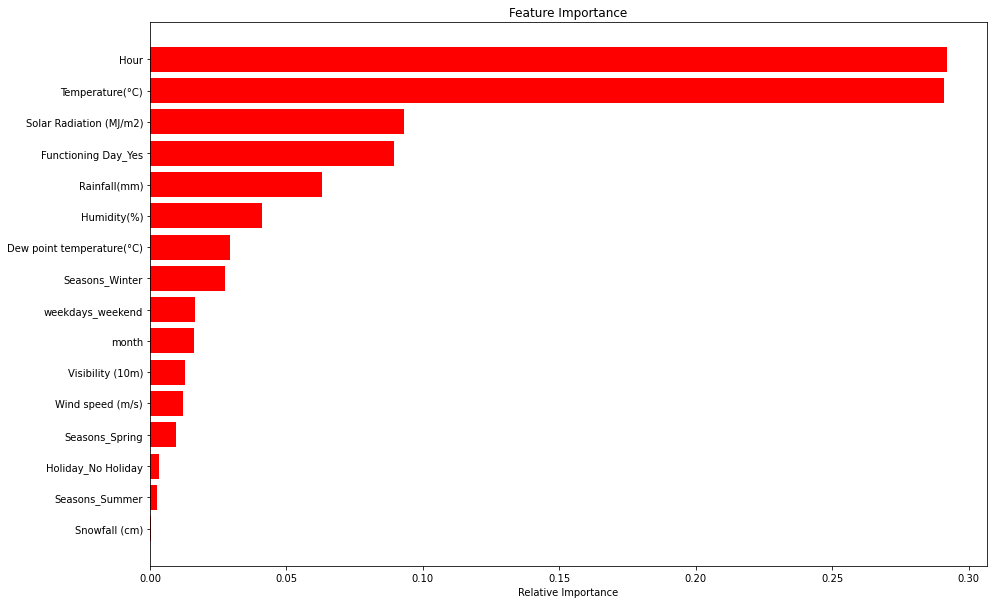

In [80]:
#getting and visualizing features_importance of gradient boosting
get_features_importance(optimal_gb_model,X_train)

#Combined Evaluation Matrix of All the models

In [81]:
#creating dictionary to store all the metrices 
all_model_matrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}

In [82]:
#list of all model made ,'Gradient_Boosting',,'CATBoost'
model_name=['Linear','Lasso','Ridge','Elasticnet','Polynomial','K-Nearyest_Neighbor','Decision_Tree','Random_Forest','Gradient_Boosting']

In [83]:
#converting dictionary to dataframe from easy visual
matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index",columns=model_name)

In [84]:
matrices_df

,Linear,Lasso,Ridge,Elasticnet,Polynomial,K-Nearyest_Neighbor,Decision_Tree,Random_Forest,Gradient_Boosting
Mean_square_error,188341.052729,188084.639024,188203.480708,188275.440909,126401.043865,78350.030272,95768.962709,58712.282070,55568.036296
Root_Mean_square_error,433.982779,433.687259,433.824251,433.907180,355.529245,279.910754,309.465608,242.306174,235.728735
R2,0.559017,0.559617,0.559339,0.559170,0.704043,0.810252,0.768066,0.857810,0.865425
Adjusted_R2,0.553577,0.554184,0.553903,0.553732,0.700392,0.807911,0.765205,0.856056,0.863765


In [85]:
#transposing matrices_df for easy and clear view and saving that as new final matrices df
final_matrices=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})

In [86]:
final_matrices

,Models,Mean_square_error,Root_Mean_square_error,R2,Adjusted_R2
0,Linear,188341.052729,433.982779,0.559017,0.553577
1,Lasso,188084.639024,433.687259,0.559617,0.554184
2,Ridge,188203.480708,433.824251,0.559339,0.553903
3,Elasticnet,188275.440909,433.907180,0.559170,0.553732
4,Polynomial,126401.043865,355.529245,0.704043,0.700392
5,K-Nearyest_Neighbor,78350.030272,279.910754,0.810252,0.807911
6,Decision_Tree,95768.962709,309.465608,0.768066,0.765205
7,Random_Forest,58712.282070,242.306174,0.857810,0.856056
8,Gradient_Boosting,55568.036296,235.728735,0.865425,0.863765


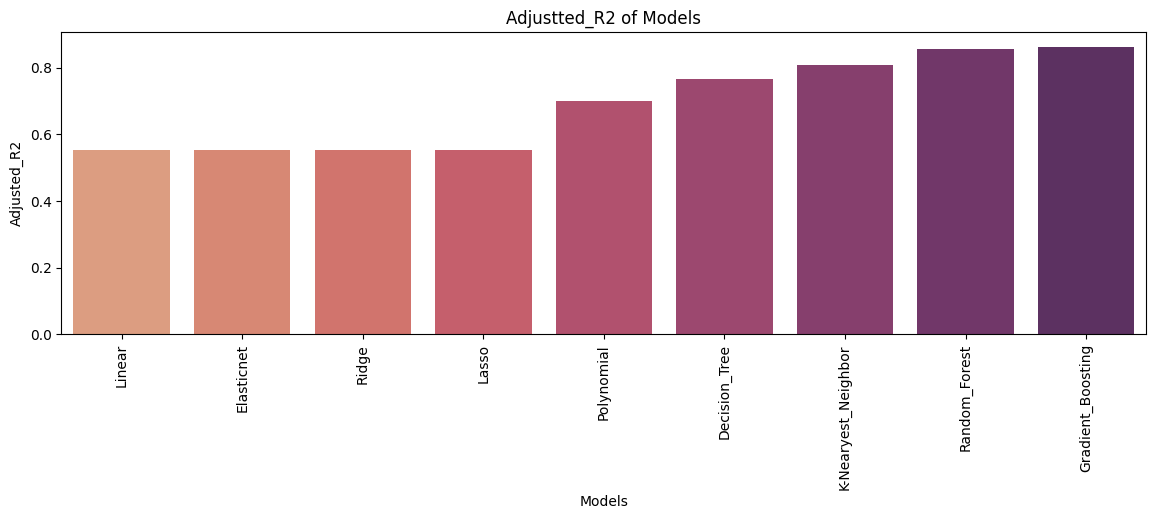

In [87]:
#creating bar plot to visualize the Adjusted R2 of model 
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Models',y='Adjusted_R2',data=final_matrices.sort_values('Adjusted_R2'),palette="flare").set(title='Adjustted_R2 of Models')
plt.xticks(rotation=90);

#Final Conclusion:

1.In holiday or non-working days there is demands in rented bikes.

2.There is a surge of high demand in the morning 8AM and in evening 6PM as the people might be going to their work at morning 8AM and returing from their work at the evening 6PM.

3.People prefered more rented bikes in the morning than the evening.

4.When the rainfall was less, people have booked more bikes except some few cases.

5.The Temperature, Hour & Humidity are the most important features that positively drive the total rented bikes count.